In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

import numpy as np

In [2]:
import ENDF6el as el
import flux_recoil_spec as frs
import importlib
import time

In [3]:
importlib.reload(frs)
importlib.reload(el)
#get Er vector
Er= np.geomspace(100/1e7, 1.0, 100)
print(np.shape(Er))
E,F,ff,ffspec = frs.SNOLAB_flux(Enmin=1e-4)
start = time.time()
isoGe,isodictGe=frs.dRdErCompound(Er,E,F,N=1,Comp='Ge')
end = time.time()
print('Evaluation Time: {:1.5f} sec.'.format(end-start))

(100,)
fast flux: 4000.0000000000005 n/m^2/day
175
shape of etot: (6000,)
6000 6000
LinregressResult(slope=-0.341989060170171, intercept=-12.883178144228603, rvalue=-0.9953352356165475, pvalue=2.847357267291413e-06, stderr=0.014824519476612728, intercept_stderr=0.06273875262265612)
0.009995281867072022 0.01
Compound Isotope Breakdown Sum (should be 1.0):1.0
{'Ge[74]': {'a': 0.3672, 'Z': 32, 'A': '74', 'Symbol': 'Ge'}, 'Ge[72]': {'a': 0.2731, 'Z': 32, 'A': '72', 'Symbol': 'Ge'}, 'Ge[70]': {'a': 0.2038, 'Z': 32, 'A': '70', 'Symbol': 'Ge'}, 'Ge[76]': {'a': 0.0783, 'Z': 32, 'A': '76', 'Symbol': 'Ge'}, 'Ge[73]': {'a': 0.0776, 'Z': 32, 'A': '73', 'Symbol': 'Ge'}}
1.206213656957064e-25
74 32 Ge
../data_files/xn_data/ge74_el.txt ../data_files/xn_data/n-032_Ge_074.endf
72 32 Ge
../data_files/xn_data/ge72_el.txt ../data_files/xn_data/n-032_Ge_072.endf
70 32 Ge
../data_files/xn_data/ge70_el.txt ../data_files/xn_data/n-032_Ge_070.endf
76 32 Ge
../data_files/xn_data/ge76_el.txt ../data_files/xn_dat

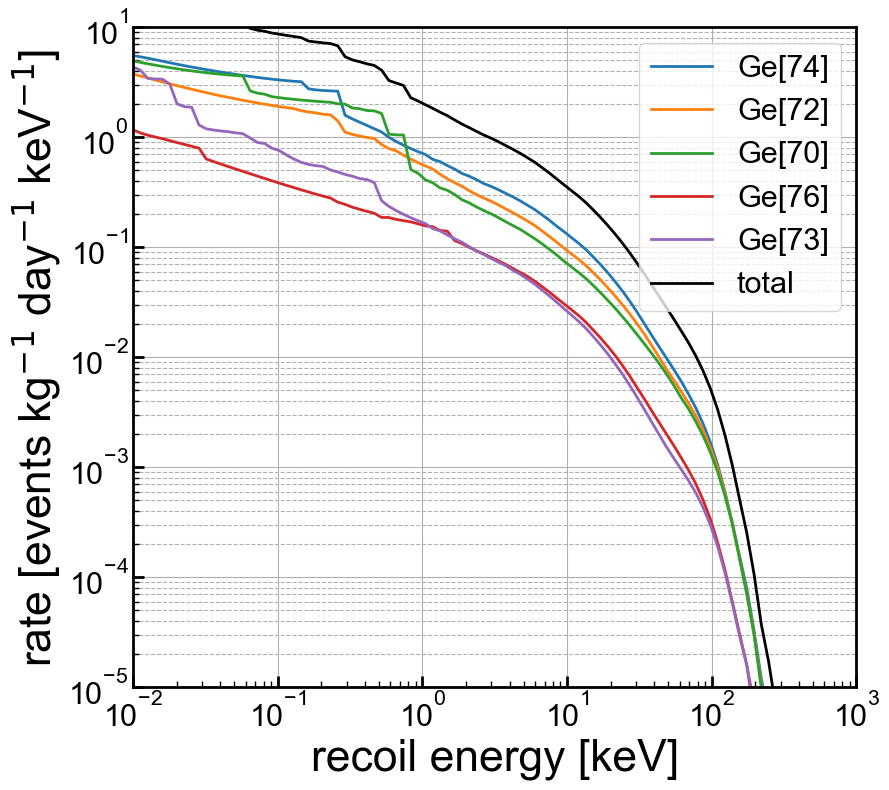

In [4]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes



#ax1.plot(Er, dRlow,label='low res')
count=0
for iso in isodictGe:
  ax1.plot(Er*1000, isodictGe[iso]*isoGe[:,count+1],label=iso)
  count+=1

ax1.plot(Er*1000, isoGe[:,0],color='k',label="total")




ymin = 1e-5
ymax = 1e1

blue = '#118DFA'
#ax1.fill_between(xcq,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
#                 label='')

plt.loglog()
plt.grid()
#ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(1e-5*1000, 1*1000) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]')
ax1.set_ylabel('rate [events kg$^{-1}$ day$^{-1}$ keV$^{-1}$]')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/ge-nn-spec-compound.png')
plt.show()

In [5]:
start = time.time()
isoCaWO4,isodictCaWO4=frs.dRdErCompound(Er,E,F,N=1,Comp='CaWO4')
end = time.time()
print('Evaluation Time: {:1.5f} sec.'.format(end-start))

Compound Isotope Breakdown Sum (should be 1.0):0.9984409269458859
{'O[16]': {'a': 0.6642622299763296, 'Z': 8, 'A': '16', 'Symbol': 'O'}, 'Ca[40]': {'a': 0.16132288941401166, 'Z': 20, 'A': '40', 'Symbol': 'Ca'}, 'W[184]': {'a': 0.0509870500027032, 'Z': 74, 'A': '184', 'Symbol': 'W'}, 'W[186]': {'a': 0.0473094592551192, 'Z': 74, 'A': '186', 'Symbol': 'W'}, 'W[182]': {'a': 0.04409780760677661, 'Z': 74, 'A': '182', 'Symbol': 'W'}, 'W[183]': {'a': 0.023812816107659365, 'Z': 74, 'A': '183', 'Symbol': 'W'}, 'Ca[44]': {'a': 0.0034713851447543183, 'Z': 20, 'A': '44', 'Symbol': 'Ca'}, 'O[18]': {'a': 0.00136505465426133, 'Z': 8, 'A': '18', 'Symbol': 'O'}, 'Ca[42]': {'a': 0.0010766952006980078, 'Z': 20, 'A': '42', 'Symbol': 'Ca'}, 'Ca[48]': {'a': 0.0003111932032929327, 'Z': 20, 'A': '48', 'Symbol': 'Ca'}, 'Ca[43]': {'a': 0.00022465819489061987, 'Z': 20, 'A': '43', 'Symbol': 'Ca'}, 'W[180]': {'a': 0.00019968818538917702, 'Z': 74, 'A': '180', 'Symbol': 'W'}}
7.955834920375295e-26
16 8 O
../data_file

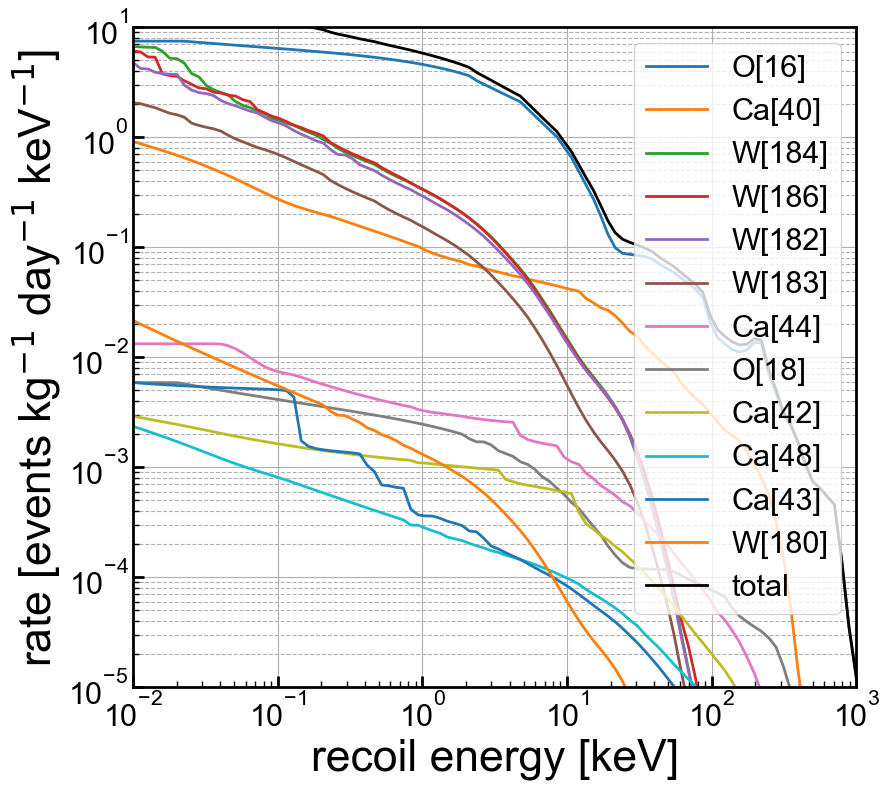

In [6]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes



#ax1.plot(Er, dRlow,label='low res')
count=0
for iso in isodictCaWO4:
  ax1.plot(Er*1000, isodictCaWO4[iso]*isoCaWO4[:,count+1],label=iso)
  count+=1

ax1.plot(Er*1000, isoCaWO4[:,0],color='k',label="total")




ymin = 1e-5
ymax = 1e1

blue = '#118DFA'
#ax1.fill_between(xcq,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
#                 label='')

plt.loglog()
plt.grid()
#ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(1e-5*1000, 1*1000) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]')
ax1.set_ylabel('rate [events kg$^{-1}$ day$^{-1}$ keV$^{-1}$]')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/cawo4-nn-spec-compound.png')
plt.show()

In [7]:
start = time.time()
isoSi,isodictSi=frs.dRdErCompound(Er,E,F,N=1,Comp='Si')
end = time.time()
print('Evaluation Time: {:1.5f} sec.'.format(end-start))

Compound Isotope Breakdown Sum (should be 1.0):0.9999999999999999
{'Si[28]': {'a': 0.92223, 'Z': 14, 'A': '28', 'Symbol': 'Si'}, 'Si[29]': {'a': 0.04685, 'Z': 14, 'A': '29', 'Symbol': 'Si'}, 'Si[30]': {'a': 0.03092, 'Z': 14, 'A': '30', 'Symbol': 'Si'}}
4.663709402042852e-26
28 14 Si
../data_files/xn_data/si28_el.txt ../data_files/xn_data/n-014_Si_028.endf
29 14 Si
../data_files/xn_data/si29_el.txt ../data_files/xn_data/n-014_Si_029.endf
30 14 Si
../data_files/xn_data/si30_el.txt ../data_files/xn_data/n-014_Si_030.endf
Evaluation Time: 933.21049 sec.


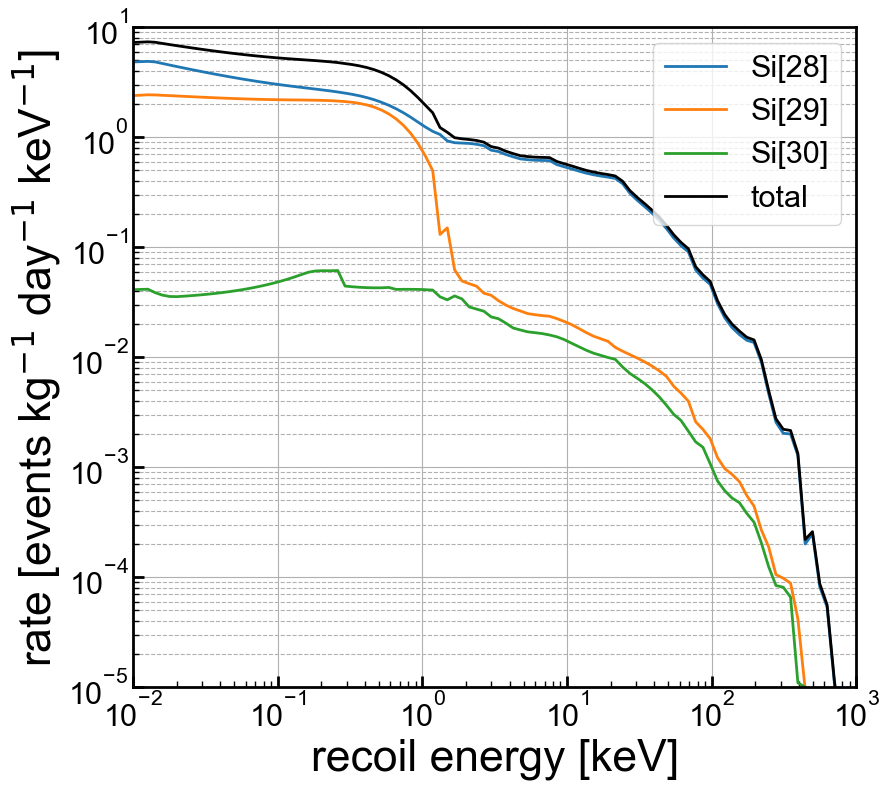

In [8]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes



#ax1.plot(Er, dRlow,label='low res')
count=0
for iso in isodictSi:
  ax1.plot(Er*1000, isodictSi[iso]*isoSi[:,count+1],label=iso)
  count+=1

ax1.plot(Er*1000, isoSi[:,0],color='k',label="total")




ymin = 1e-5
ymax = 1e1

blue = '#118DFA'
#ax1.fill_between(xcq,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
#                 label='')

plt.loglog()
plt.grid()
#ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(1e-5*1000, 1*1000) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]')
ax1.set_ylabel('rate [events kg$^{-1}$ day$^{-1}$ keV$^{-1}$]')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/si-nn-spec-compound.png')
plt.show()

In [9]:
#test a pure isotope:
print(frs.organizeCompound('Si[30]'))

Compound Isotope Breakdown Sum (should be 1.0):0.9999999999999999
{'Si[28]': {'a': 0.92223, 'Z': 14, 'A': '28', 'Symbol': 'Si'}, 'Si[29]': {'a': 0.04685, 'Z': 14, 'A': '29', 'Symbol': 'Si'}, 'Si[30]': {'a': 0.03092, 'Z': 14, 'A': '30', 'Symbol': 'Si'}}


In [27]:
import h5py

In [59]:
importlib.reload(frs)
iso,isodict=frs.dRdErCompoundSave(Er,E,F,N=1,Comp='Si')
print(iso)
print(isodict)

/Users/villaa/Research/n-elec-scattering/saved_data/dRdEr-SNOLAB.h5
[[7.288366e+00 5.257064e+00 5.120404e+01 1.333583e+00]
 [7.333969e+00 5.286630e+00 5.159081e+01 1.340572e+00]
 [7.385456e+00 5.320060e+00 5.202758e+01 1.346870e+00]
 ...
 [3.357851e-06 3.489067e-06 2.035999e-06 1.447032e-06]
 [9.252095e-07 9.445414e-07 7.376464e-07 6.328059e-07]
 [3.067649e-07 3.152569e-07 2.435468e-07 1.492696e-07]]
{'Si[28]': 0.92223, 'Si[29]': 0.04685, 'Si[30]': 0.03092}


In [48]:
f = h5py.File('../saved_data/dRdEr-SNOLAB.h5','a')
path='{}/{}/'.format('Si','0.0')

#remove vars
exEr = path+'Er' in f
exEn = path+'En' in f
exF = path+'F' in f
exiso = path+'iso' in f
exisodict = path+'isodict' in f


if exEr:
  del f[path+'Er']
if exEn:
  del f[path+'En']
if exF:
  del f[path+'F']
if exiso:
  del f[path+'iso']
if exisodict:
  del f[path+'isodict']
    
dset = f.create_dataset(path+'Er',np.shape(Er),dtype=np.dtype('float64').type)
dset[...] = Er
dset = f.create_dataset(path+'En',np.shape(E),dtype=np.dtype('float64').type)
dset[...] = E
dset = f.create_dataset(path+'F',np.shape(F),dtype=np.dtype('float64').type)
dset[...] = F
dset = f.create_dataset(path+'iso',np.shape(isoSi),dtype=np.dtype('float64').type)
dset[...] = isoSi
ds = f.create_dataset(path+'isodict', shape=4, dtype=h5py.string_dtype())
ds[:] = str(isodictSi)
    
    
f.close()

In [45]:
f = h5py.File('../saved_data/dRdEr-SNOLAB.h5','a')
path='{}/{}/'.format('Ge','0.0')

#remove vars
exEr = path+'Er' in f
exEn = path+'En' in f
exF = path+'F' in f
exiso = path+'iso' in f
exisodict = path+'isodict' in f


if exEr:
  del f[path+'Er']
if exEn:
  del f[path+'En']
if exF:
  del f[path+'F']
if exiso:
  del f[path+'iso']
if exisodict:
  del f[path+'isodict']
    
dset = f.create_dataset(path+'Er',np.shape(Er),dtype=np.dtype('float64').type)
dset[...] = Er
dset = f.create_dataset(path+'En',np.shape(E),dtype=np.dtype('float64').type)
dset[...] = E
dset = f.create_dataset(path+'F',np.shape(F),dtype=np.dtype('float64').type)
dset[...] = F
dset = f.create_dataset(path+'iso',np.shape(isoGe),dtype=np.dtype('float64').type)
dset[...] = isoGe
ds = f.create_dataset(path+'isodict', shape=4, dtype=h5py.string_dtype())
ds[:] = str(isodictGe)
    
    
f.close()

In [47]:
f = h5py.File('../saved_data/dRdEr-SNOLAB.h5','a')
path='{}/{}/'.format('CaWO4','0.0')

#remove vars
exEr = path+'Er' in f
exEn = path+'En' in f
exF = path+'F' in f
exiso = path+'iso' in f
exisodict = path+'isodict' in f


if exEr:
  del f[path+'Er']
if exEn:
  del f[path+'En']
if exF:
  del f[path+'F']
if exiso:
  del f[path+'iso']
if exisodict:
  del f[path+'isodict']
    
dset = f.create_dataset(path+'Er',np.shape(Er),dtype=np.dtype('float64').type)
dset[...] = Er
dset = f.create_dataset(path+'En',np.shape(E),dtype=np.dtype('float64').type)
dset[...] = E
dset = f.create_dataset(path+'F',np.shape(F),dtype=np.dtype('float64').type)
dset[...] = F
dset = f.create_dataset(path+'iso',np.shape(isoCaWO4),dtype=np.dtype('float64').type)
dset[...] = isoCaWO4
ds = f.create_dataset(path+'isodict', shape=4, dtype=h5py.string_dtype())
ds[:] = str(isodictCaWO4)
    
    
f.close()

In [49]:


import nexusformat.nexus as nx
f = nx.nxload('../saved_data/dRdEr-SNOLAB.h5')
print(f.tree)
f.close()

root:NXroot
  CaWO4:NXgroup
    0.0:NXgroup
      En = float64(14691)
      Er = float64(100)
      F = float64(14691)
      iso = float64(100x13)
      isodict = ["{'O[16]': 0.6642622299763296, 'Ca[40]': 0.161322889414...
  Ge:NXgroup
    0.0:NXgroup
      En = float64(14691)
      Er = float64(100)
      F = float64(14691)
      iso = float64(100x6)
      isodict = ["{'Ge[74]': 0.3672, 'Ge[72]': 0.2731, 'Ge[70]': 0.2038,...
  Si:NXgroup
    0.0:NXgroup
      En = float64(14691)
      Er = float64(100)
      F = float64(14691)
      iso = float64(100x4)
      isodict = ["{'Si[28]': 0.92223, 'Si[29]': 0.04685, 'Si[30]': 0.030...


In [41]:
import json